In [102]:
# Title     - Predicting Hospital Readmissions
# Group No. - 90
# Members   - Gawesh L. A. M. S. - EG/2020/3941
#             Ranawaka N. L. N   - EG/2020/4143

In [103]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-processing

In [104]:
# load dataset
df = pd.read_csv('data/diabetic_data.csv')

In [105]:
# get summary statistics of the data
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [106]:
# get type and non-null count of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [107]:
# get the first 10 samples of the dataframe. transpose is taken for readability
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [108]:
# count number of samples of each type in the 'readmitted' column
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [109]:
# create new column for binary classification
df['new_output_label'] = (df.readmitted=='<30').astype('int')

In [110]:
# count number of samples of each type in the 'new_output_label' column
df.groupby('new_output_label').size()

new_output_label
0    90409
1    11357
dtype: int64

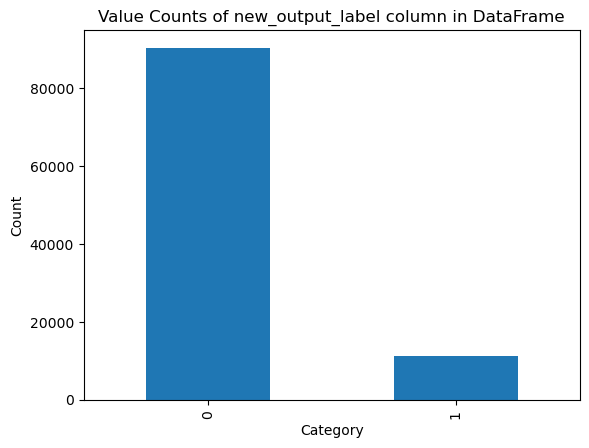

In [111]:
# Plot the new_output_label column
df['new_output_label'].value_counts().plot(kind='bar')

# x-axis label
plt.xlabel('Category')

# y-axis label
plt.ylabel('Count')

# title of the graph
plt.title('Value Counts of new_output_label column in DataFrame')
plt.show()

In [112]:
# discharge_disposition_id - where the patient went after hospitalization
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [113]:
# filter IDs that are related to death or hospice
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [114]:
# remaining number of samples once the filtering is done
len(df)

99343

In [115]:
# Defining a function to calculate the prevalence as we will be re-using it many times. 
# Here, prevalence gives the ratio of the readmitted to the whole
def calculate_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [116]:
# prevalence of current dataframe
print('Prevalence: %.4f'%calculate_prevalence(df['new_output_label'].values))

Prevalence: 0.1139


In [117]:
# print the unique values if the number of unique values is less than 30. Else, print number of unique values

for column in list(df.columns):
    n = df[column].unique()

    if len(n) < 30:
        print(column)
        print(n)
    else:
        print(column + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

In [118]:
# save explored dataframe to new .csv file
df.to_csv('data/explored_data.csv')

In [119]:
# INSIGHTS

# encounter_id, patient_nbr - not important for the prediction
# age, weight - categorical features
# examide and citoglipton only have 1 value. therefore, not used


## Feature Engineering  

In [120]:
# replace all '?' values with nan
df = df.replace('?',np.nan)

#### Numerical features

In [121]:
# define variable to track numerical features
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [122]:
# check for null values in numerical variables
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

#### Categorical features

In [123]:
# define variable to track categorical features
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']

In [124]:
# check for null values in categorical variables
df[cols_cat].isnull().sum()

race                         2234
gender                          0
max_glu_serum               94191
A1Cresult                   82509
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

In [125]:
# assign 'UNK' to null values
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')
df['max_glu_serum'] = df['max_glu_serum'].fillna('UNK')
df['A1Cresult'] = df['A1Cresult'].fillna('UNK')

In [126]:
# re-check for null values
df[cols_cat].isnull().sum()

race                        0
gender                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
payer_code                  0
dtype: int64

In [127]:
# medical_specialty - specialty of physician

# print number of unique values in this column
print('Number medical specialty:', df.medical_specialty.nunique())

# sort the values
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

#### Most values are UNK. Also, a large variation between the number of samples for 73 variables. Therefore, reducing the number of variables to 11 by considering the top_10 variables and assigning the rest to a new 'Other' category

In [128]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma','Family/GeneralPractice',
          'Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [129]:
# group data by unique values and counting the number of occurences 
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

### Applying One Hot Encoding


In [130]:
# define a variable to track below 3 variables. They are seen as numeric but actually categrical
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# convert numerical data into strings as 'get_dummies' function doesn't work on numerical data
df[cols_cat_num] = df[cols_cat_num].astype('str')

In [131]:
# one-hot encoding using True and False values and dropping the first column as usual
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [132]:
# get first 5 rows of dataframe
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_Norm,max_glu_serum_UNK,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [133]:
# convert boolean values True and False to Integer values 0 and 1
df_cat = df_cat.astype(int)

In [134]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_Norm,max_glu_serum_UNK,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [135]:
# define variable to track all categorical features after one-hot encoding
cols_all_cat = list(df_cat.columns)
print(cols_all_cat)

['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_UNK', 'gender_Male', 'gender_Unknown/Invalid', 'max_glu_serum_>300', 'max_glu_serum_Norm', 'max_glu_serum_UNK', 'A1Cresult_>8', 'A1Cresult_Norm', 'A1Cresult_UNK', 'metformin_No', 'metformin_Steady', 'metformin_Up', 'repaglinide_No', 'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_No', 'glimepiride_Steady', 'glimepiride_Up', 'acetohexamide_Steady', 'glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up', 'tolbutamide_Steady', 'pioglitazone_No', 'pioglitazone_Steady', 'pioglitazone_Up', 'rosiglitazone_No', 'rosiglitazone_Steady', 'rosiglitazone_Up', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'miglitol_No', 'miglitol_Steady', 'miglitol_Up', 'troglitazone_Steady', 'tolazamide_Steady', 'tolazamide_Up', 'insulin_No', 'insulin_Steady', 'insulin

In [136]:
# concatenate the newly one hot encoded categorical features with the original dataframe
df = pd.concat([df,df_cat], axis = 1)

In [137]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,0,0,0,0,0,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,0,0,0,0,0,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,0,0,0,0,0,0,0,0,1


In [138]:
# age and weight are categorical data. Therefore, converting them to numerical data

# get first 5 rows of 'age' and 'weight' columns
df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [139]:
# check for null values in age column
df.age.isnull().sum()

0

In [140]:
# get a count of all age categories
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [141]:
# convert age to numerical data as it is naturally ordered. 0-10 is replaced with 0, 10-20 with 10,...
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

In [142]:
# check for non-null values in weight column. It was mentioned in the dataset that the weight column is mostly empty
df.weight.notnull().sum()

3125

In [143]:
# consider whether the weight was present or not
df['has_weight'] = df.weight.notnull().astype('int')

In [144]:
# track the new ccolumns
cols_extra = ['age_group','has_weight']

In [145]:
# Feature Engineering summary
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 143
Numerical Features: 8
Categorical Features: 133
Extra features: 2


In [146]:
# check if we are missing any data
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital               0
discharge_disposition_id_16    0
admission_type_id_6            0
admission_type_id_7            0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_12    0
discharge_disposition_id_15    0
discharge_disposition_id_17    0
admission_type_id_4            0
dtype: int64

In [147]:
# defining new variable to track columns to be used for the model
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['new_output_label']]

In [148]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,new_output_label
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,1,10,0,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,20,0,0
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,1,30,0,0
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,1,40,0,0


## Split data into Training/Validation/Test Samples

Training - 70%     
Validation - 15%    
Test - 15%

In [149]:
# shuffle the samples before splitting
df_data = df_data.sample(n = len(df_data), random_state = 42)

# reset the index column after shuffling
df_data = df_data.reset_index(drop = True)

It is important that validation and test come from similar distributions. Therefore, using sample method to extract 30% for validation/test splits

In [150]:
# save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [151]:
# splitting test and validation
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [152]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [153]:
# find prevalence in the split groups
print('Test prevalence(n = %d):%.4f'%(len(df_test), calculate_prevalence(df_test.new_output_label.values)))
print('Valid prevalence(n = %d):%.4f'%(len(df_valid), calculate_prevalence(df_valid.new_output_label.values)))
print('Train all prevalence(n = %d):%.4f'%(len(df_train_all), calculate_prevalence(df_train_all.new_output_label.values)))

Test prevalence(n = 14902):0.1172
Valid prevalence(n = 14901):0.1131
Train all prevalence(n = 69540):0.1134


In [154]:
print('all samples (n = %d)'%len(df_data))

# asserts that
print('test + valid + train_all: ',len(df_test)+len(df_valid)+len(df_train_all))

all samples (n = 99343)
test + valid + train_all:  99343


#### As the noumber of positives (readmissions) is very low compared to the negatives, we need to balance it first before training the model

In [155]:
# split the training data into positive and negative
rows_pos = df_train_all.new_output_label == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calculate_prevalence(df_train.new_output_label.values)))

Train balanced prevalence(n = 15766):0.500


In [156]:
# save data
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [157]:
# create input matrix X and output vector y
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['new_output_label'].values
y_valid = df_valid['new_output_label'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 143)
Training shapes: (15766, 143) (15766,)
Validation shapes: (14901, 143) (14901,)


In [158]:
# scale the data. Random forest doesn't need scaling but logistic regression does
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

# transform data into matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

X_test = df_test[col2use].values
y_test = df_test['new_output_label'].values
X_test_tf = scaler.transform(X_test)

StandardScaler()

#### Performance metrics

In [163]:
# functions to evaluate the performance of the model

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# define function to calculate specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

# calculates and prints required performance metrics
def print_report(y_actual, y_pred, thresh):    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calculate_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 


In [164]:
# set threshold to 0.5 to label a predicted sample as positive
thresh = 0.5

## Training the model

### Logistic Regression

In [166]:
# import Logistic Regression algorithm and train the model
from sklearn.linear_model import LogisticRegression

# random_state = 42 for reproducibility
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [167]:
# predict probabilities for positive class
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]
y_test_preds = lr.predict_proba(X_test_tf)[:,1]

# print modelperformance metrics for logistic regression
print('Logistic Regression')
# training set metrics
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
# validation set metrics
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
# test set metrics
print('Test:')
lr_test_auc, lr_test_accuracy, lr_test_recall, lr_test_precision, lr_test_specificity = print_report(y_test,y_test_preds, thresh)

Logistic Regression
Training:
AUC:0.678
accuracy:0.628
recall:0.558
precision:0.649
specificity:0.698
prevalence:0.500
 
Validation:
AUC:0.661
accuracy:0.662
recall:0.558
precision:0.180
specificity:0.675
prevalence:0.113
 
Test:
AUC:0.659
accuracy:0.656
recall:0.558
precision:0.183
specificity:0.669
prevalence:0.117
 


### Random Forest

In [168]:
# import random forest algorithm and train the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [169]:
# predict probabilities for positive class
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]
y_test_preds = rf.predict_proba(X_test_tf)[:,1]

# print modelperformance metrics for random forest
print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
rf_test_auc, rf_test_accuracy, rf_test_recall, rf_test_precision, rf_test_specificity = print_report(y_test,y_test_preds, thresh)

Random Forest
Training:
AUC:0.696
accuracy:0.642
recall:0.633
precision:0.645
specificity:0.652
prevalence:0.500
 
Validation:
AUC:0.655
accuracy:0.615
recall:0.615
precision:0.169
specificity:0.614
prevalence:0.113
 
Test:
AUC:0.656
accuracy:0.614
recall:0.618
precision:0.175
specificity:0.613
prevalence:0.117
 


## Hyperparameter Optimization

### Random Forest

In [177]:
# get current parameters of the random forest model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [178]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in the forest
n_estimators = range(200,1000,200)
# maximum number of features to consider for the best split at each node
max_features = ['auto','sqrt']
# maximum depth of the tree for controlling the maximum depth of the decision tree
max_depth = range(1,10,1)
# minimum number of samples to split an internal node
min_samples_split = range(2,10,2)
# criterion used for evaluating a split
criterion = ['gini','entropy']

# random grid of hyperparameter values to be used in RandomizedSearchCV
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [179]:
from sklearn.metrics import make_scorer, roc_auc_score

#create scoring function using ROC AUC
auc_scoring = make_scorer(roc_auc_score)

In [180]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [181]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")


In [182]:
import time

# fit the random forest classifier using ramdom search mode
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
# get the time taken
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


73.52608156204224


In [183]:
# get the best set of hyperparameters of rf_random
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [200]:
# predict probabilities for the positive class using baseline random forest
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]
y_test_preds = rf.predict_proba(X_test_tf)[:,1]

# AUC scores for baseline random forest
print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)
rf_test_auc_base = roc_auc_score(y_test, y_test_preds)

# AUC scores for each set
print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))
print('Test AUC:%.3f'%(rf_test_auc_base))
print()

# for optimized random forest
print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
y_test_preds_random = rf_random.best_estimator_.predict_proba(X_test_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)
rf_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))
print('Test AUC:%.3f'%(rf_test_auc))

Baseline Random Forest
Training AUC:0.696
Validation AUC:0.655
Test AUC:0.656

Optimized Random Forest
Training AUC:0.722
Validation AUC:0.662
Test AUC:0.660


## Logistic Regression

In [201]:
# parameter grid for random serach
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
    'max_iter': range(100, 500, 100)
}

# Create randomized search cross-validation for Logistic Regression
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=lr_param_grid,
                                    n_iter=20, cv=3, scoring='roc_auc', verbose=0, random_state=42)



In [202]:
# Measure time taken for fitting Logistic Regression
t1_logreg = time.time()
lr_random.fit(X_train_tf, y_train)
t2_logreg = time.time()

In [203]:
# get the best set of hyperparameters of lr_random
lr_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'C': 0.01}

In [204]:
# predict probabilities for the positive class using baseline logistic regression
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]
y_test_preds = lr.predict_proba(X_test_tf)[:,1]

# AUC scores for baseline logistic regression
print('Baseline Logistic Regression')
lr_train_auc_base = roc_auc_score(y_train, y_train_preds)
lr_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)
lr_test_auc_base = roc_auc_score(y_test, y_test_preds)

# AUC scores for each set
print('Training AUC:%.3f'%(lr_train_auc_base))
print('Validation AUC:%.3f'%(lr_valid_auc_base))
print('Test AUC:%.3f'%(lr_test_auc_base))
print()

# for optimized logistic regression
print('Optimized Logistic Regression')
y_train_preds_random = lr_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = lr_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
y_test_preds_random = lr_random.best_estimator_.predict_proba(X_test_tf)[:,1]
logreg_train_auc = roc_auc_score(y_train, y_train_preds_random)
logreg_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)
logreg_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(logreg_train_auc))
print('Validation AUC:%.3f'%(logreg_valid_auc))
print('Test AUC:%.3f'%(logreg_test_auc))

Baseline Logistic Regression
Training AUC:0.678
Validation AUC:0.661
Test AUC:0.659

Optimized Logistic Regression
Training AUC:0.678
Validation AUC:0.662
Test AUC:0.660


### Model Evaluation

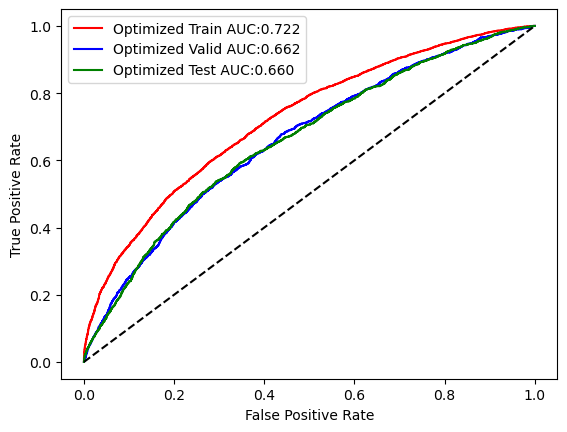

In [205]:
from sklearn.metrics import roc_curve

# predict probabilities for the positive class using the optimized Random Forest
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:, 1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:, 1]
y_test_preds_random = rf_random.best_estimator_.predict_proba(X_test_tf)[:, 1]

# calculate ROC curve and AUC for the optimized Random Forest on the training set
fpr_train_random, tpr_train_random, thresholds_train_random = roc_curve(y_train, y_train_preds_random)
auc_train_random = roc_auc_score(y_train, y_train_preds_random)

# for validation set
fpr_valid_random, tpr_valid_random, thresholds_valid_random = roc_curve(y_valid, y_valid_preds_random)
auc_valid_random = roc_auc_score(y_valid, y_valid_preds_random)

# for test set
fpr_test_random, tpr_test_random, thresholds_test_random = roc_curve(y_test, y_test_preds_random)
auc_test_random = roc_auc_score(y_test, y_test_preds_random)

# plot ROC curves for the optimized Random Forest on training, validation, and test sets
plt.plot(fpr_train_random, tpr_train_random, 'r-', label='Optimized Train AUC:%.3f' % auc_train_random)
plt.plot(fpr_valid_random, tpr_valid_random, 'b-', label='Optimized Valid AUC:%.3f' % auc_valid_random)
plt.plot(fpr_test_random, tpr_test_random, 'g-', label='Optimized Test AUC:%.3f' % auc_test_random)

# plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# set axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()


## Conclusion  
Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. Our best model had an AUC of 0.722 and an accuracy of 61%. Using this model, we are able to catch more readmissions than randomly selecting patients.
